In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import random
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from rembg import remove

def show_img(img, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150)
    ax.set_title( title, fontsize=16, color='black')
    ax.axes.xaxis.set_visible(False) # X軸を非表示に
    ax.axes.yaxis.set_visible(False) # Y軸を非表示に
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    return fig, ax

def show_imgs(imgs_dict:dict, ncol=0, dpi=400):
    if ncol != 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    fig = plt.figure(dpi=dpi)
    for i, key in enumerate(imgs_dict, start=1):
        ax = fig.add_subplot(nrow, ncol, i)
        ax.axis('off')
        ax.imshow(cv2.cvtColor(imgs_dict[key], cv2.COLOR_BGR2RGB))
        ax.set_title(key, fontsize=3, color='black')

    return None


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


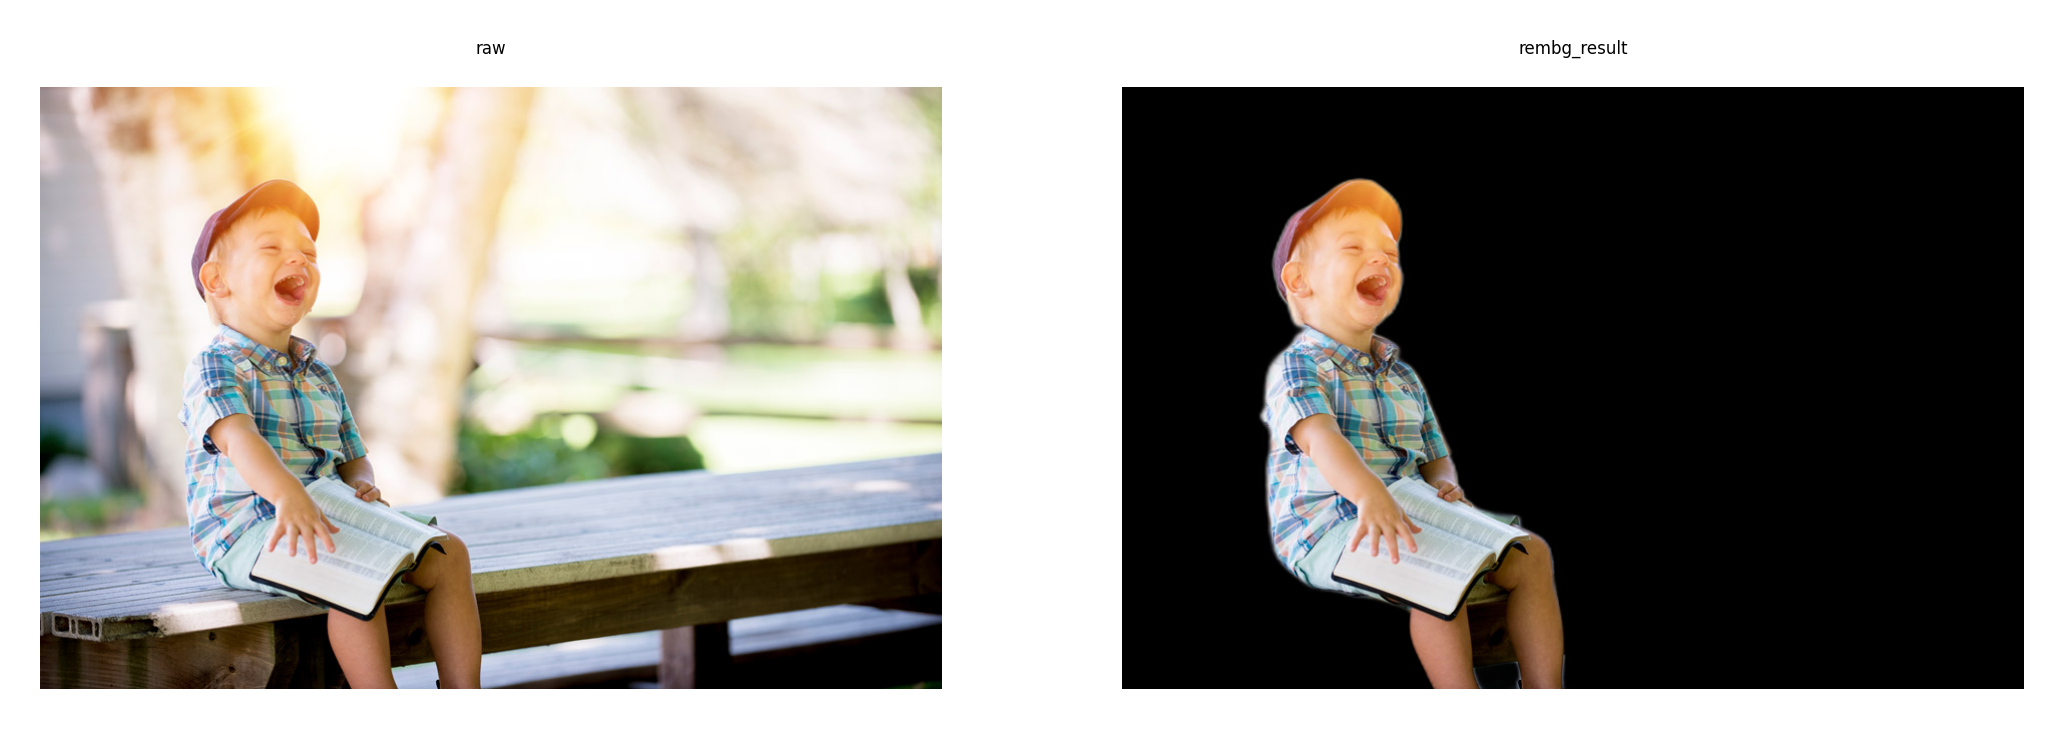

In [6]:
image_path = Path("../sample_data/sample_jpg.jpg")
img = cv2.imread(str(image_path))
imgs = {"raw" : img}

rembg_result = remove( img, 
                       alpha_matting = False,
                       alpha_matting_background_threshold = 240, 
                       alpha_matting_erode_size           = 10, 
                       alpha_matting_foreground_threshold = 10
                      )
imgs["rembg_result"] = rembg_result

show_imgs(imgs)
